In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import analysis_utils as aua

In [3]:
sample = pd.read_csv('data/backup_imu_data.csv')
sample

FileNotFoundError: [Errno 2] No such file or directory: 'data/backup_imu_data.csv'

In [ ]:
sample_1024 = pd.read_csv('../data/sample_1024.csv')
# sample_1024 = pd.read_csv('../data/lp_sample_1024.csv')
sample_1024

,id,time_micros,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time_micros_delta
0,0,11264916,9.765453,0.083777,-1.087909,0.043066,-0.054062,0.003054,10241004.0
1,1,11266912,9.730146,0.055652,-1.090303,0.043066,-0.054062,0.003054,1996.0
2,2,11267912,9.775027,0.056849,-1.064571,0.043066,-0.054062,0.003054,1000.0
3,3,11268912,9.773830,0.100533,-1.080729,0.043066,-0.054062,0.003054,1000.0
4,4,11269912,9.740918,0.078392,-1.141766,0.043066,-0.054062,0.003054,1000.0
...,...,...,...,...,...,...,...,...,...
1019,1019,12284912,9.797767,0.073604,-1.174080,0.041539,-0.041844,0.021380,1000.0
1020,1020,12285912,9.771437,0.074801,-1.144758,0.041539,-0.041844,0.021380,1000.0
1021,1021,12286912,9.855813,0.095147,-1.218961,0.041539,-0.041844,0.021380,1000.0
1022,1022,12287912,9.764256,0.068219,-1.135782,0.041539,-0.041844,0.021380,1000.0


In [ ]:
# berechnen den zeitabstand zwischen anfang und ende des samples
sample_time_delta = sample_1024['time_micros'].iloc[-1] - sample_1024['time_micros'].iloc[0]

sample_1024['time_micros'].iloc[0], sample_1024['time_micros'].iloc[-1], sample_time_delta

(np.int64(11264916), np.int64(12288912), np.int64(1023996))

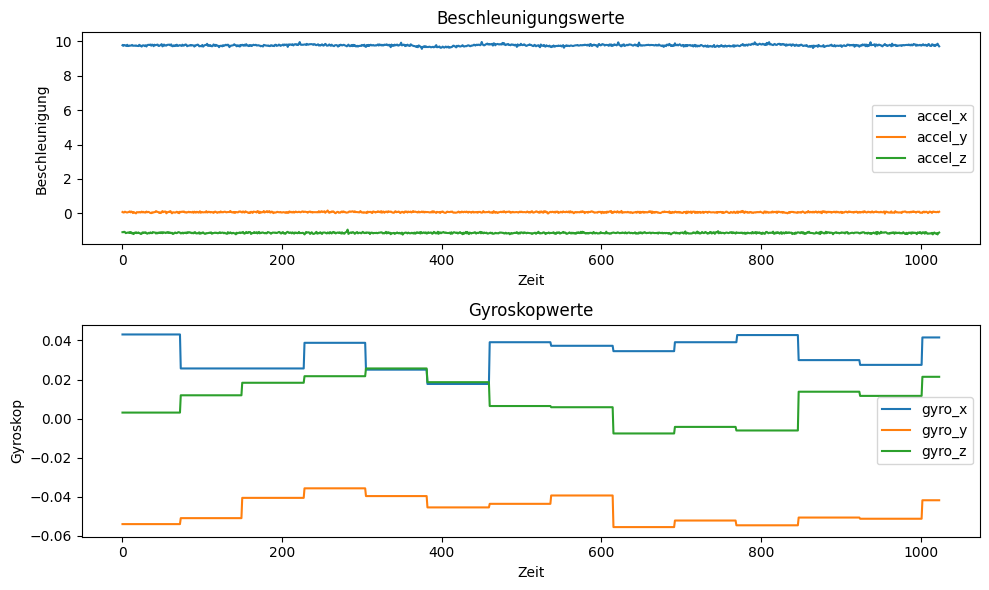

In [ ]:
# Plotten der Daten
plt.figure(figsize=(10, 6))

# Plotten der Beschleunigungswerte
plt.subplot(2, 1, 1)
plt.plot(sample_1024[['accel_x', 'accel_y', 'accel_z']], label=['accel_x', 'accel_y', 'accel_z'])
plt.xlabel('Zeit')
plt.ylabel('Beschleunigung')
plt.title('Beschleunigungswerte')
plt.legend()

# Plotten der Gyroskopwerte
plt.subplot(2, 1, 2)
plt.plot(sample_1024[['gyro_x', 'gyro_y', 'gyro_z']], label=['gyro_x', 'gyro_y', 'gyro_z'])
plt.xlabel('Zeit')
plt.ylabel('Gyroskop')
plt.title('Gyroskopwerte')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# fft für gyrowerte errechnen

gyro_columns = [
    sample_1024['gyro_x'],
    sample_1024['gyro_y'],
    sample_1024['gyro_z'],
]

# fourier_data = []
# for col in gyro_columns:
#     result = aua.get_fourier(col)
#     x_frequencies.append(result)
# in kurz:
gyro_fourier_data = [aua.get_fourier(col, sample_time_delta) for col in gyro_columns]
gyro_fourier_data
len(gyro_fourier_data)

NameError: name 'sample_1024' is not defined

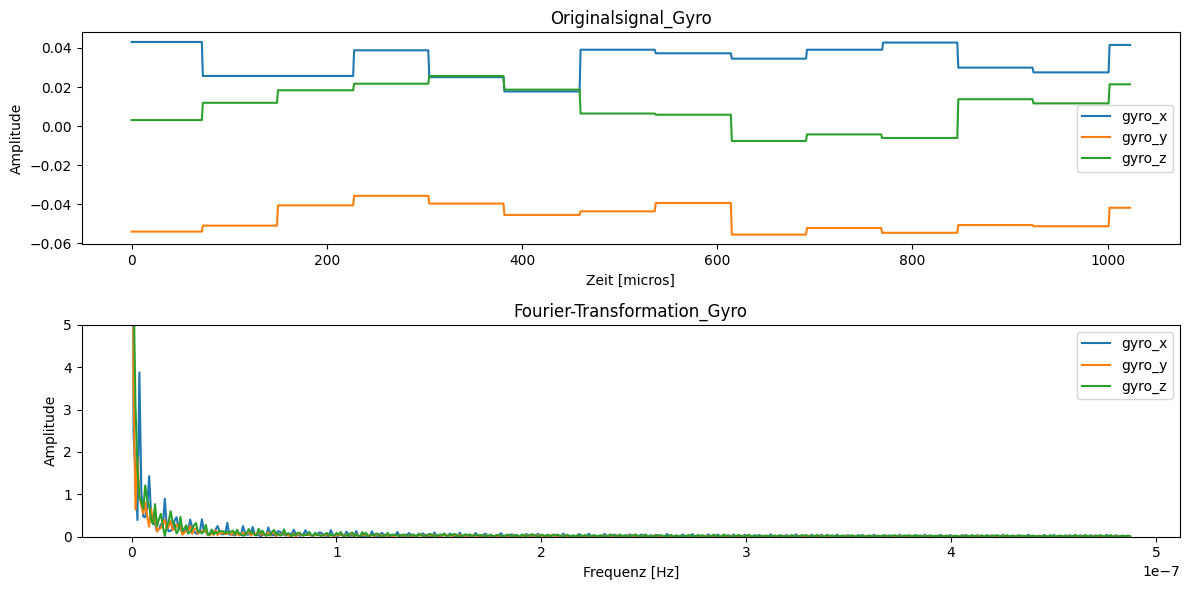

In [ ]:
# Plotten des Originalsignals für gyrowerte
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
for signal in gyro_columns:
    # plt.scatter(sample_1024['time_micros'], signal, s=1)
    plt.plot(signal)
plt.title('Originalsignal_Gyro')
plt.xlabel('Zeit [micros]')
plt.ylabel('Amplitude')
plt.legend(['gyro_x', 'gyro_y', 'gyro_z'])


# Plotten der Fourier-Transformation (Amplitude)
plt.subplot(2, 1, 2)
for x_freq, y_fourier in gyro_fourier_data:
    # abs -> betrag
    # plt.scatter(x_freq, np.abs(y_fourier), s=1)
    plt.plot(x_freq, np.abs(y_fourier))
plt.title('Fourier-Transformation_Gyro')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
# plt.xlim(0, .0000006)  # Fokus auf den interessanten Frequenzbereich
plt.ylim(0, 5)  # Fokus auf den interessanten Frequenzbereich

# plt.xscale('log')
# plt.yscale('log')

plt.legend(['gyro_x', 'gyro_y', 'gyro_z'])



plt.tight_layout()
plt.show()

In [ ]:
# fft für accelwerte errechnen

accel_columns = [
    sample_1024['accel_x'],
    sample_1024['accel_y'],
    sample_1024['accel_z'],
]

accel_fourier_data = [aua.get_fourier(col, sample_time_delta) for col in accel_columns]
accel_fourier_data

[(array([0.00000000e+00, 9.53678042e-10, 1.90735608e-09, 2.86103413e-09,
         3.81471217e-09, 4.76839021e-09, 5.72206825e-09, 6.67574629e-09,
         7.62942433e-09, 8.58310238e-09, 9.53678042e-09, 1.04904585e-08,
         1.14441365e-08, 1.23978145e-08, 1.33514926e-08, 1.43051706e-08,
         1.52588487e-08, 1.62125267e-08, 1.71662048e-08, 1.81198828e-08,
         1.90735608e-08, 2.00272389e-08, 2.09809169e-08, 2.19345950e-08,
         2.28882730e-08, 2.38419510e-08, 2.47956291e-08, 2.57493071e-08,
         2.67029852e-08, 2.76566632e-08, 2.86103413e-08, 2.95640193e-08,
         3.05176973e-08, 3.14713754e-08, 3.24250534e-08, 3.33787315e-08,
         3.43324095e-08, 3.52860875e-08, 3.62397656e-08, 3.71934436e-08,
         3.81471217e-08, 3.91007997e-08, 4.00544778e-08, 4.10081558e-08,
         4.19618338e-08, 4.29155119e-08, 4.38691899e-08, 4.48228680e-08,
         4.57765460e-08, 4.67302240e-08, 4.76839021e-08, 4.86375801e-08,
         4.95912582e-08, 5.05449362e-08, 5.14986143

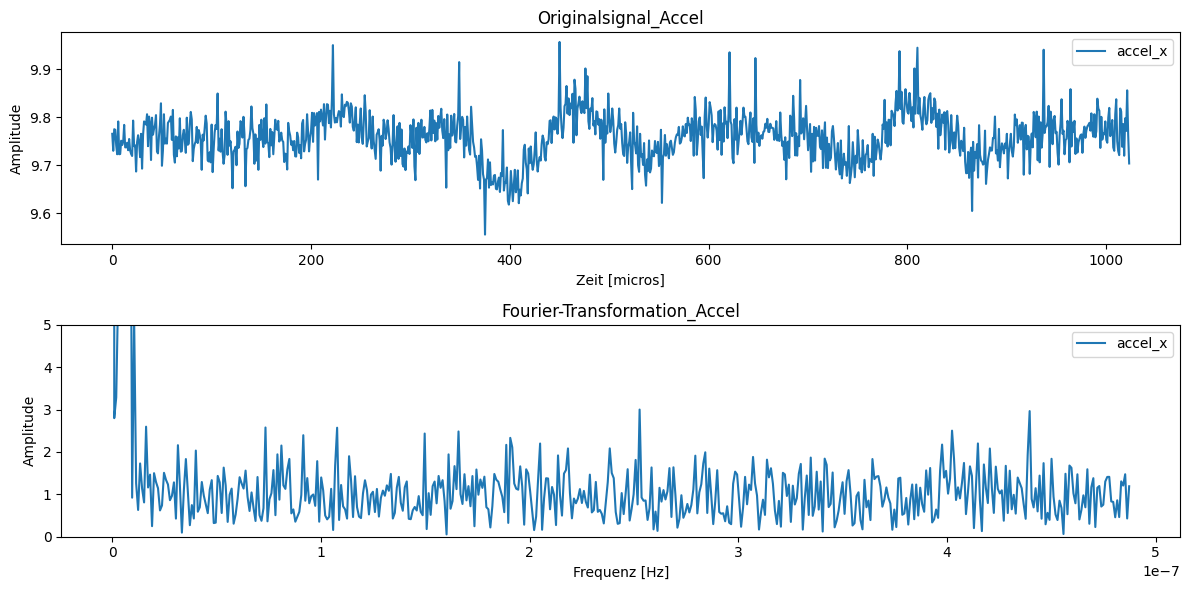

In [ ]:
# Plotten des Originalsignals für gyrowerte
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
for signal in accel_columns[:1]:
    # plt.scatter(sample_1024['time_micros'], signal, s=1)
    plt.plot(signal)
plt.title('Originalsignal_Accel')
plt.xlabel('Zeit [micros]')
plt.ylabel('Amplitude')
plt.legend(['accel_x', 'accel_y', 'accel_z'])


# Plotten der Fourier-Transformation (Amplitude)
plt.subplot(2, 1, 2)
for x_freq, y_fourier in accel_fourier_data[:1]:
    # abs -> betrag
    # plt.scatter(x_freq, np.abs(y_fourier), s=1)
    plt.plot(x_freq, np.abs(y_fourier))
plt.title('Fourier-Transformation_Accel')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
# plt.xlim(0, .0000006)  # Fokus auf den interessanten Frequenzbereich
plt.ylim(0, 5)  # Fokus auf den interessanten Frequenzbereich

# plt.xscale('log')
# plt.yscale('log')

plt.legend(['accel_x', 'accel_y', 'accel_z'])



plt.tight_layout()
plt.show()

**niedrige Frequenz in Hertz (1/Periode pro Sekunde)**
- große/lange Periode (wenig Schwingungen pro Sekunde)
- tiefer Ton

**hohe Frequenz in Hertz (1/Periode pro Sekunde)**
- kleine/kurze Periode (viele Schwingungen pro Sekunde)
- hoher Ton